In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
import numpy as np
import pandas as pd
from scipy import interpolate

In [20]:
# Get f(z)
fieldOnAxis = pd.read_csv('~/documents/ETHZ/Semester_Project_Master_Thesis/awa_masters/fieldmaps/short_wiggler_period_8_5cm_gap_14_5mm.txt',
                          skiprows = 1, delim_whitespace = True, names = ['pos', 'B'])
z = np.array(fieldOnAxis['pos'])  # [mm]
f = np.array(fieldOnAxis['B'])  # [T]
f = interpolate.interp1d(z, f, kind = 'cubic')
# Get values on grid. Length units = [mm]
gap = 14.5
B0 = 1.3625
lu = 85
ku = 2 * np.pi / lu
Nz = 500
Nx = 100
z = np.linspace(z[0], z[-1], Nz)
dz = z[1] - z[0]
x = np.linspace(0.0, gap/2, Nx)
Bx = np.zeros([Nx,Nz])
Bz = np.zeros([Nx,Nz])
print('(Nx, Nz) = (', Nx, ', ', Nz, '), ku = ', ku, '. Computing fields...')
for i in range(Nx):
    for j in range(Nz):
        Bx[i,j] = np.cosh(ku * x[i]) * f(z[j]) / B0
        if j != 0:
            Bz[i,j] = Bz[i,j-1] - dz * ku * np.sinh(ku * x[i]) * f(z[j] - dz/2) / B0
    if i%int(Nx/10) == 0:
        print(str(i/Nx*100) + ' percent of the gridpoints are computed')
print('Done')

(Nx, Nz) = ( 100 ,  500 ), ku =  0.07391982714328925 . Computing fields...
0.0 percent of the gridpoints are computed


10.0 percent of the gridpoints are computed


20.0 percent of the gridpoints are computed


30.0 percent of the gridpoints are computed


40.0 percent of the gridpoints are computed


50.0 percent of the gridpoints are computed


60.0 percent of the gridpoints are computed


70.0 percent of the gridpoints are computed


80.0 percent of the gridpoints are computed


90.0 percent of the gridpoints are computed


Done


In [52]:
# Write fieldmap file
# fn = 'wigglerField.T7'
# out = open(fn, "w")
# out.write('2DMagnetostatic ZX')
# out.write('\n')
# out.write('{:.2f} '.format(x[0]/10) + '{:.2f} '.format(x[-1]/10) + str(Nx-1))
# out.write('\n')
# out.write('{:.2f} '.format(z[0]/10) + '{:.2f} '.format(z[-1]/10) + str(Nz-1))
# out.write('\n')

# for j in range(Nz):
#     for i in range(Nx):
#         out.write('{:.5f} '.format(Bx[i,j]) + '{:.5f}'.format(Bz[i,j]))
#         out.write('\n')
# out.close()
# del Bx
# del Bz

Plotting...


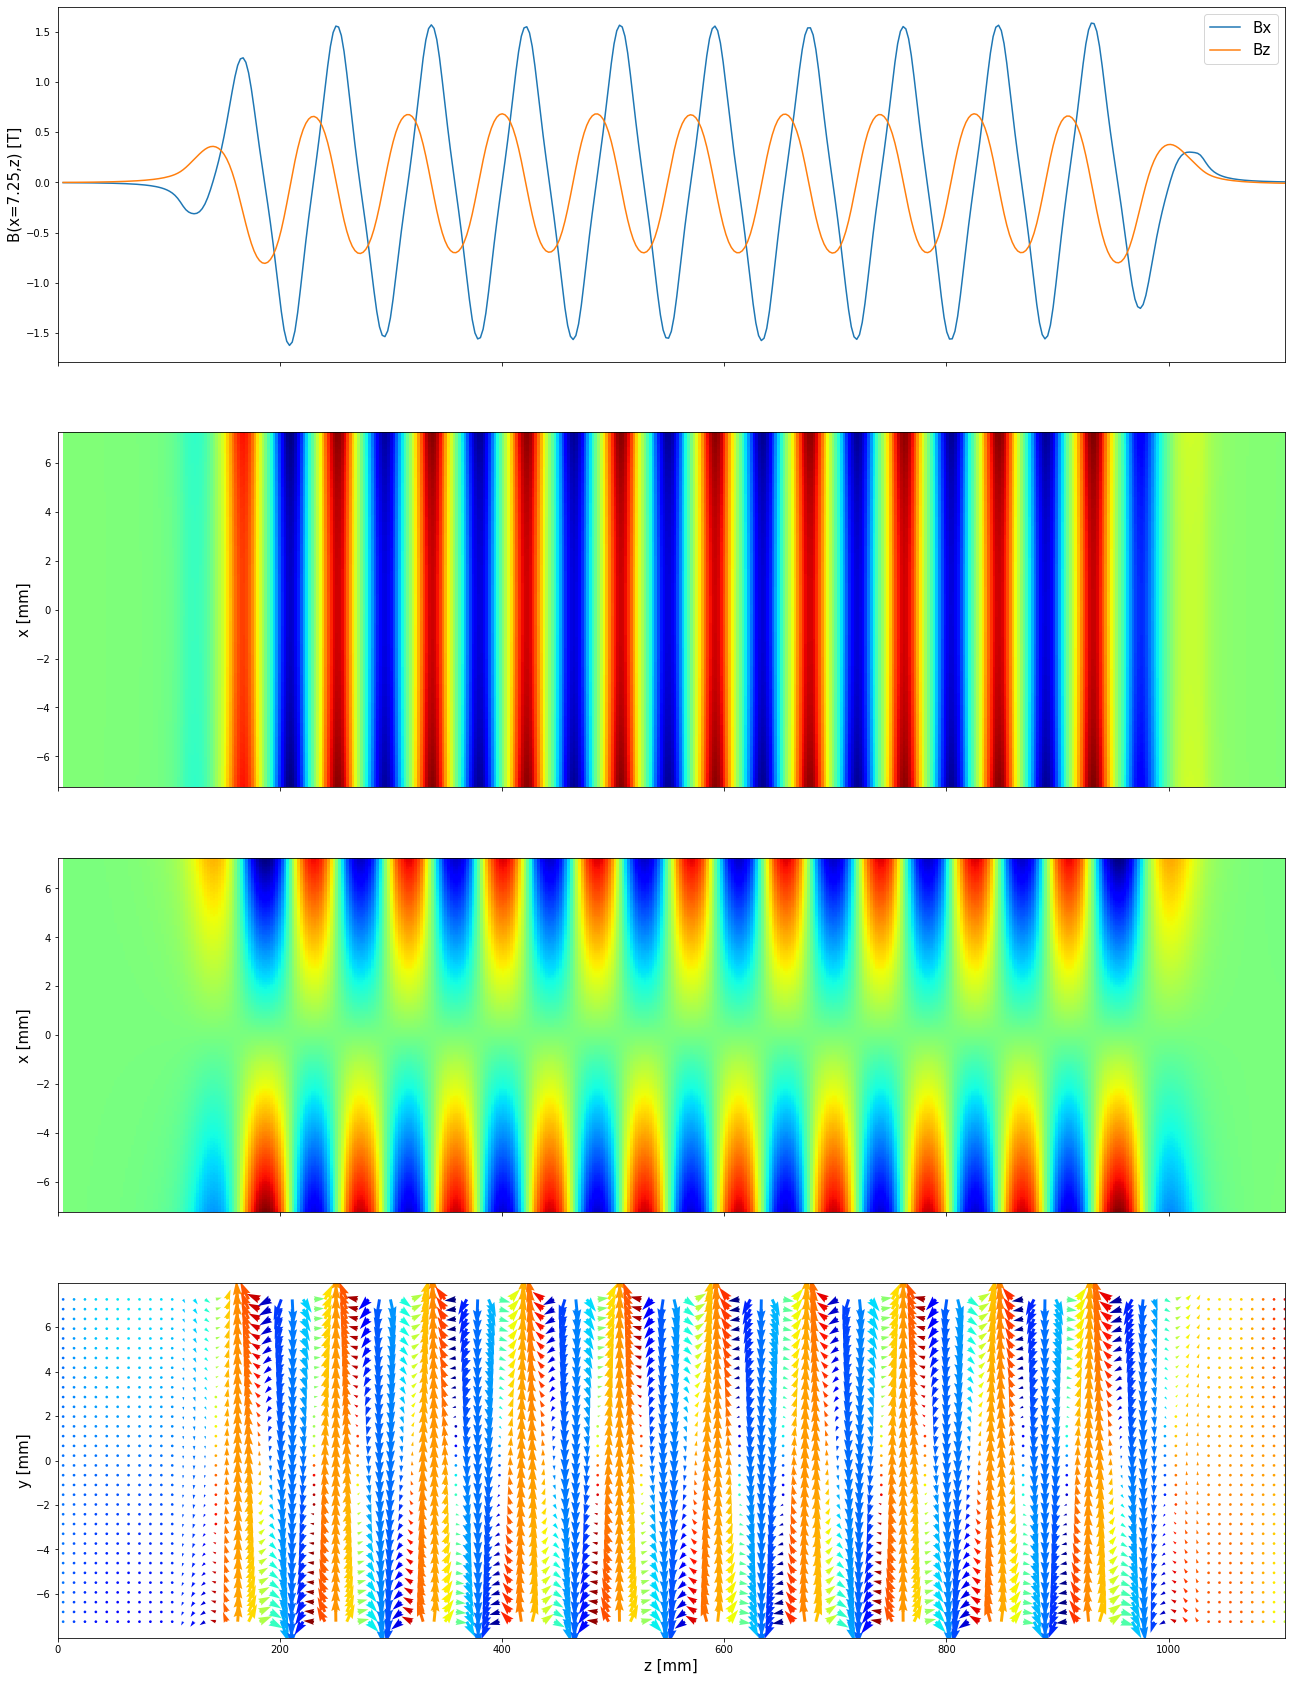

In [22]:
# Plot
print('Plotting...')
fs = 15
fig, ax = plt.subplots(4,1, figsize = (22, 30), sharex = True)
ax[0].plot(z, B0 * Bx[-1])
ax[0].plot(z, B0 * Bz[-1])
ax[0].legend(['Bx', 'Bz'], fontsize = fs)
ax[0].set_ylabel('B(x=7.25,z) [T]', fontsize = fs)
# ax[0].set_xlabel('z [mm]', fontsize = fs)
NxExt = 2*Nx-1
xExt = np.linspace(-x[-1], x[-1], NxExt)
BxExt = np.zeros([NxExt, Nz])
BzExt = np.zeros([NxExt, Nz])
for i in range(NxExt):
    for j in range(Nz):
        ii = i+1 - Nx
        BxExt[i,j] = B0 * Bx[np.abs(ii),j]
        BzExt[i,j] = B0 * np.sign(ii) * Bz[np.abs(ii),j]
ax[1].pcolor(z, xExt, BxExt, cmap = 'jet')
ax[1].set_ylabel('x [mm]', fontsize = fs)
# ax[1].set_xlabel('z [mm]', fontsize = fs)
ax[2].pcolor(z, xExt, BzExt, cmap = 'jet')
ax[2].set_ylabel('x [mm]', fontsize = fs)
# ax[2].set_xlabel('z [mm]', fontsize = fs)
skx = 6
skz = 4
C = np.arctan2(BxExt[::skx,::skz], BzExt[::skx,::skz])
q = ax[3].quiver(z[::skz], xExt[::skx], BzExt[::skx,::skz], BxExt[::skx,::skz], C, cmap = 'jet')
ax[3].set_ylabel('y [mm]', fontsize = fs)
ax[3].set_xlabel('z [mm]', fontsize = fs)

for axi in ax:
    axi.set_xlim(left = 0, right = 13*lu)

plt.savefig('FieldVectors.png', bbox_inches='tight')
plt.show()



Plotting...


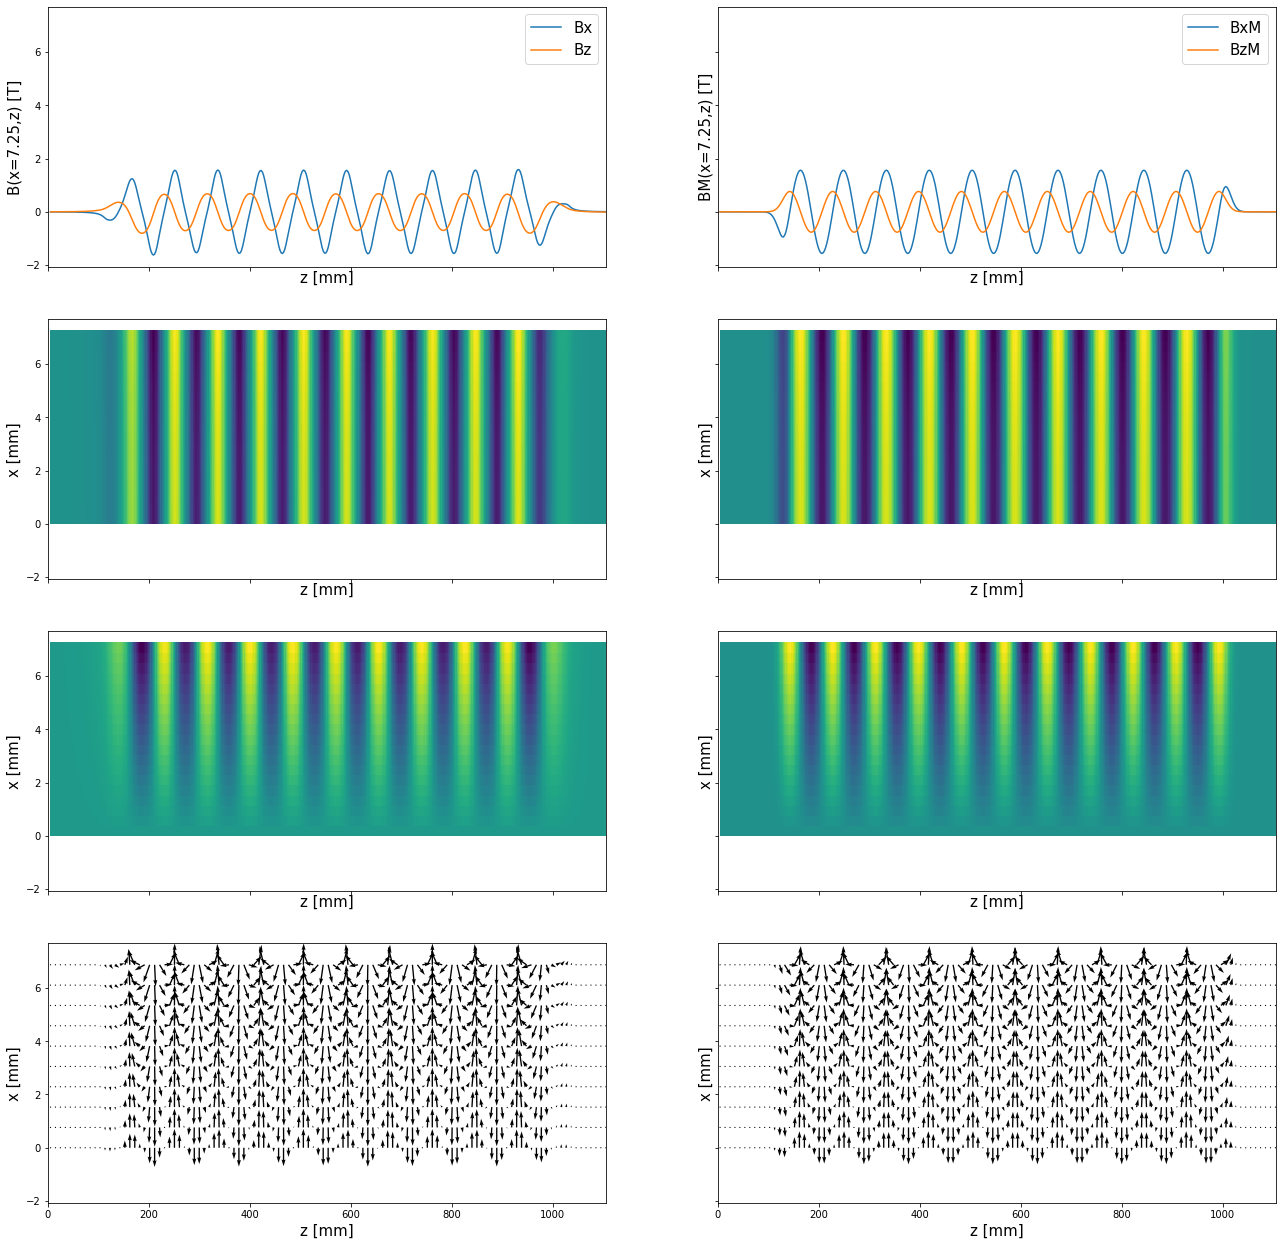

In [13]:
# Compare to Mithra
BxM = np.zeros([Nx,Nz])
BzM = np.zeros([Nx,Nz])
Nu = 10
start = 143
for i in range(Nx):
    for j in range(Nz):
        lz = z[j] - start
        if lz >=0 and lz < Nu * lu:
            BxM[i,j] = B0 * np.cosh(ku * x[i]) * np.sin(ku * lz)
            BzM[i,j] = B0 * np.sinh(ku * x[i]) * np.cos(ku * lz)
        elif lz < 0:
            BxM[i,j] = B0 * np.cosh(ku * x[i]) * ku * lz * np.exp(-(ku * lz)** 2 / 2.0)
            BzM[i,j] = B0 * np.sinh(ku * x[i]) * np.exp(-(ku * lz)** 2 / 2.0)
        elif lz > lu * Nu:
            lz -= lu * Nu
            BxM[i,j] = B0 * np.cosh(ku * x[i]) * ku * lz * np.exp(-(ku * lz)** 2 / 2.0)
            BzM[i,j] = B0 * np.sinh(ku * x[i]) * np.exp(-(ku * lz)** 2 / 2.0)

# Plot
print('Plotting...')
fs = 15
fig, ax = plt.subplots(4,2, figsize = (22, 22), sharex = True, sharey = True)
ax[0,0].plot(z, B0*Bx[-1])
ax[0,0].plot(z, B0*Bz[-1])
ax[0,0].legend(['Bx', 'Bz'], fontsize = fs)
ax[0,0].set_ylabel('B(x=7.25,z) [T]', fontsize = fs)
ax[0,0].set_xlabel('z [mm]', fontsize = fs)
ax[1,0].pcolor(z, x, B0*Bx)
ax[1,0].set_ylabel('x [mm]', fontsize = fs)
ax[1,0].set_xlabel('z [mm]', fontsize = fs)
ax[2,0].pcolor(z, x, B0*Bz)
ax[2,0].set_ylabel('x [mm]', fontsize = fs)
ax[2,0].set_xlabel('z [mm]', fontsize = fs)
q = ax[3,0].quiver(z[::skz], x[::skx], B0*Bz[::skx,::skz], B0*Bx[::skx,::skz])
ax[3,0].set_ylabel('x [mm]', fontsize = fs)
ax[3,0].set_xlabel('z [mm]', fontsize = fs)
ax[0,1].plot(z, BxM[-1])
ax[0,1].plot(z, BzM[-1])
ax[0,1].legend(['BxM', 'BzM'], fontsize = fs)
ax[0,1].set_ylabel('BM(x=7.25,z) [T]', fontsize = fs)
ax[0,1].set_xlabel('z [mm]', fontsize = fs)
ax[1,1].pcolor(z, x, BxM)
ax[1,1].set_ylabel('x [mm]', fontsize = fs)
ax[1,1].set_xlabel('z [mm]', fontsize = fs)
ax[2,1].pcolor(z, x, BzM)
ax[2,1].set_ylabel('x [mm]', fontsize = fs)
ax[2,1].set_xlabel('z [mm]', fontsize = fs)
q = ax[3,1].quiver(z[::skz], x[::skx], BzM[::skx,::skz], BxM[::skx,::skz])
ax[3,1].set_ylabel('x [mm]', fontsize = fs)
ax[3,1].set_xlabel('z [mm]', fontsize = fs)

for axi in ax.reshape(-1):
    axi.set_xlim(left = 0, right = 13*lu)

plt.show()

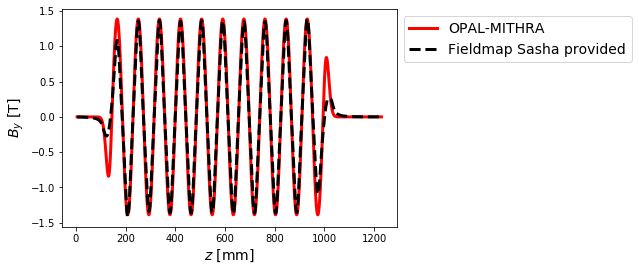

In [18]:
z = np.array(fieldOnAxis['pos'])  # [mm]
f = np.array(fieldOnAxis['B'])  # [T]
lu = 85
ku = 2 * np.pi / lu
Nu = 10
B0 = np.max(f)
start = 145
f_Mithra = np.zeros(len(z))
for i,zi in enumerate(z):
    lz = zi - start
    if lz >=0 and lz < Nu*lu:
        f_Mithra[i] = B0 *np.sin(ku * lz)
    elif lz < 0:
        f_Mithra[i] = B0 * ku * lz * np.exp(-(ku * lz)** 2 / 2.0)
    elif lz > Nu*lu:
        lz -= Nu*lu
        f_Mithra[i] = B0 * ku * lz * np.exp(-(ku * lz)** 2 / 2.0)

fs = 14
plt.plot(z, f_Mithra, lw = 3, color = 'r')
plt.plot(z, f, lw = 3, ls = '--', color = 'k')
plt.legend(['OPAL-MITHRA','Fieldmap Sasha provided'], fontsize = fs, bbox_to_anchor = [1., 1.])
plt.ylabel('$B_y$ [T]', fontsize = fs)
plt.xlabel('$z$ [mm]', fontsize = fs)
plt.savefig('tests/plots/fieldComparison.png', bbox_inches='tight')
plt.show()
